In [1]:
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
from scipy import stats

In [2]:
posiciones=['UU','U','C','D','DD']
imagenes=[]
for i in posiciones:
    imagenes.append(Image.open('DiagramaET1-'+i+'.png'))

In [3]:
matrices = []
for i in imagenes:
    matrices.append(np.array(i))

In [4]:
#Calibracion pix/mm
Cal = 1
fps = 1 #Pixel/seg == FPS

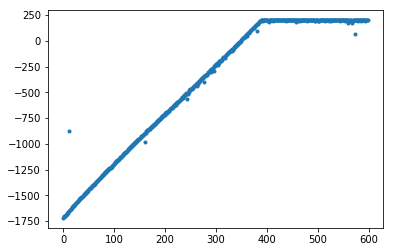

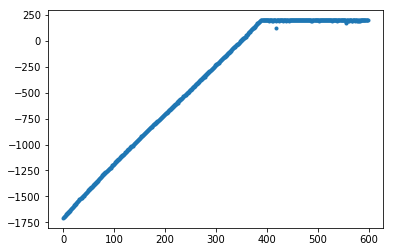

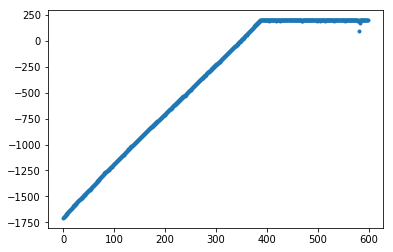

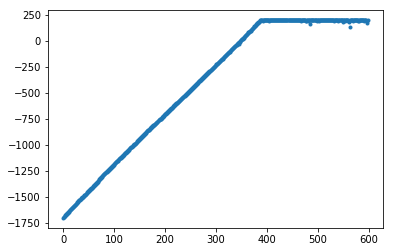

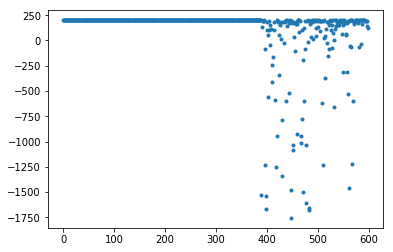

In [5]:
x = []
y = []
c=-1
for m in matrices:
    c = c + 1
    x.append([])
    y.append([])
    for i in range(len(m[0,:])):
        for j in range(len(m[:,0])):
            if m[len(m[:,0])-1-j,i]==0:
                x[c].append(i/Cal)
                y[c].append(j/fps)
                break
                
for i in range(len(x)):
    plt.figure()
    plt.plot(x[i],200-np.asarray(y[i]),'.')

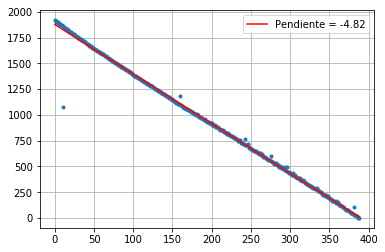

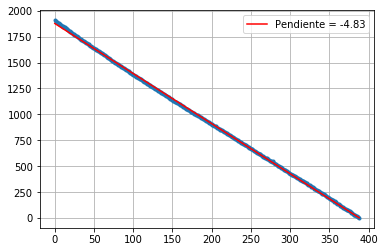

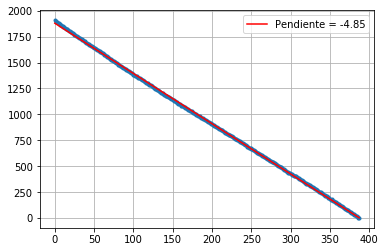

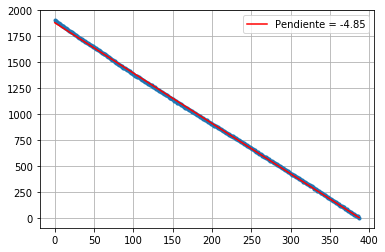

In [48]:
xx=[]
yy=[]
c=-1
for s,r in zip(y,x):
    c=c+1
    xx.append([])
    yy.append([])
    for i in range(len(s)):
        yy[c].append(s[i])
        xx[c].append(r[i])
        if s[i]<1:
            break
            
for j in range(len(xx)-1):
    gradient, intercept, r_value, p_value, std_err = stats.linregress(xx[j],2000-np.asarray(yy[j]))
    plt.figure()
    plt.plot(xx[j],yy[j],'.')
    plt.plot(xx[j],np.asarray(xx[j])*gradient + intercept,'r',label='Pendiente = '+str(round(gradient,2)))
    plt.legend()
    plt.grid(b=True, which='major')